<a href="https://colab.research.google.com/github/hvr2026/Decision-trees/blob/main/Adaboost%20Algorithm/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.base import clone
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (ensure the CSV file is available in Colab)
file_path = '/content/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

In [3]:
# Separate features and target
X = diabetes_data.drop(columns=["PatientID", "Diabetic"])
y = diabetes_data["Diabetic"]

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [9]:
# Implement AdaBoost with Logistic Regression base estimator
class AdaBoost:
    def __init__(self, base_estimator, n_estimators, learning_rate=1.0):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            estimator = clone(self.base_estimator)
            estimator.fit(X, y, sample_weight=weights)
            y_pred = estimator.predict(X)

            err = np.sum(weights * (y_pred != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))

            weights *= np.exp(-alpha * y * (2 * y_pred - 1))
            weights /= np.sum(weights)

            self.estimators.append(estimator)
            self.alphas.append(alpha)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for alpha, estimator in zip(self.alphas, self.estimators):
            pred += alpha * (2 * estimator.predict(X) - 1)
        return np.sign(pred).astype(int)

In [10]:
# Train AdaBoost
ada_clf = AdaBoost(
    base_estimator=LogisticRegression(solver="lbfgs", max_iter=100),
    n_estimators=10,
    learning_rate=0.5,
)
ada_clf.fit(X_train, y_train)

In [11]:
# Predictions
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [12]:
# Correct predictions to match labels (from -1, 1 to 0, 1)
y_train_pred_corrected = (y_train_pred + 1) // 2
y_test_pred_corrected = (y_test_pred + 1) // 2

# Accuracies
train_accuracy_corrected = np.mean(y_train_pred_corrected == y_train)
test_accuracy_corrected = np.mean(y_test_pred_corrected == y_test)

print(f"Training Accuracy: {train_accuracy_corrected:.2f}")
print(f"Testing Accuracy: {test_accuracy_corrected:.2f}")

Training Accuracy: 0.79
Testing Accuracy: 0.78


In [13]:
# Confusion Matrix
conf_matrix_corrected = confusion_matrix(y_test, y_test_pred_corrected)
disp_corrected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_corrected, display_labels=[0, 1])


<Figure size 800x600 with 0 Axes>

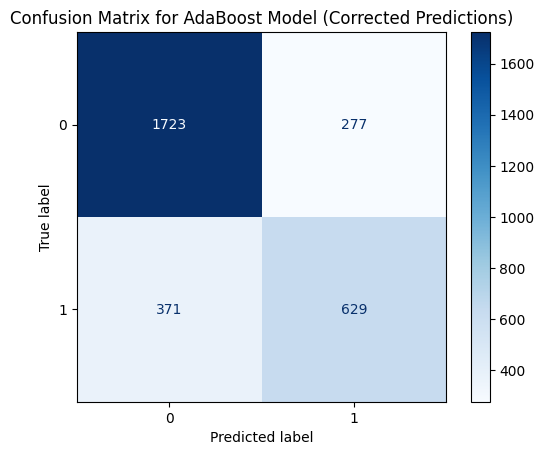

In [14]:
plt.figure(figsize=(8, 6))
disp_corrected.plot(cmap="Blues")
plt.title("Confusion Matrix for AdaBoost Model (Corrected Predictions)")
plt.show()


In [15]:
# ROC Curve and AUC
fpr_corrected, tpr_corrected, thresholds_corrected = roc_curve(y_test, y_test_pred_corrected)
roc_auc_corrected = roc_auc_score(y_test, y_test_pred_corrected)


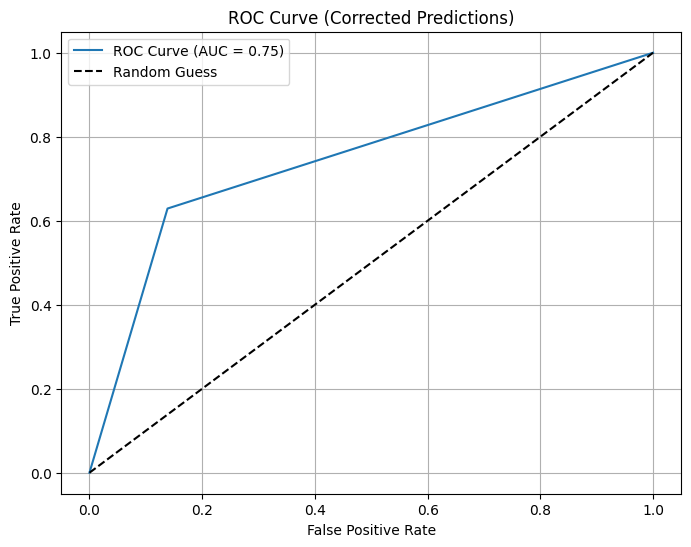

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_corrected, tpr_corrected, label=f"ROC Curve (AUC = {roc_auc_corrected:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Corrected Predictions)")
plt.legend()
plt.grid()
plt.show()


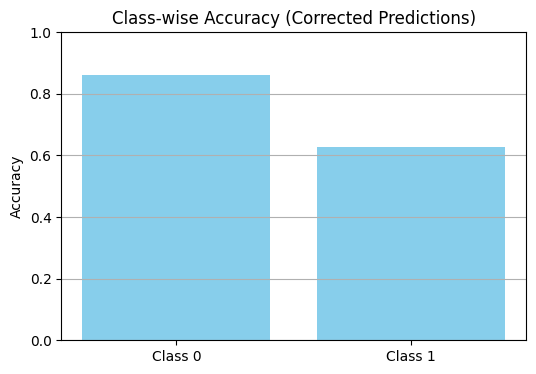

In [17]:
# Class-wise Accuracy
class_accuracies_corrected = conf_matrix_corrected.diagonal() / conf_matrix_corrected.sum(axis=1)
plt.figure(figsize=(6, 4))
plt.bar(["Class 0", "Class 1"], class_accuracies_corrected, color="skyblue")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy (Corrected Predictions)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


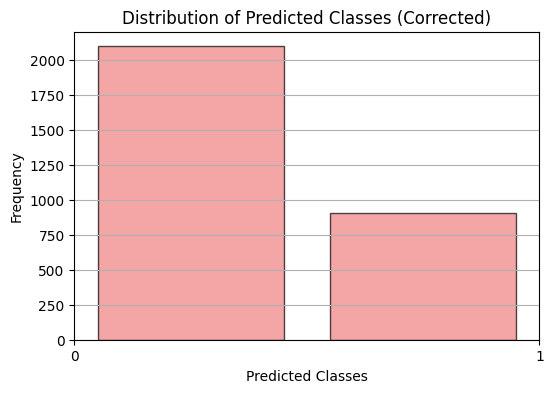

In [18]:
# Distribution of Corrected Predictions
plt.figure(figsize=(6, 4))
plt.hist(y_test_pred_corrected, bins=2, color="lightcoral", edgecolor="black", alpha=0.7, rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel("Predicted Classes")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Classes (Corrected)")
plt.grid(axis="y")
plt.show()

In [19]:
# Additions to visualize performance
class AdaBoost:
    def __init__(self, base_estimator, n_estimators, learning_rate=1.0):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.alphas = []
        self.errors = []
        self.sample_weights = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            estimator = clone(self.base_estimator)
            estimator.fit(X, y, sample_weight=weights)
            y_pred = estimator.predict(X)

            err = np.sum(weights * (y_pred != y)) / np.sum(weights)
            self.errors.append(err)
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            self.alphas.append(alpha)

            weights *= np.exp(-alpha * y * (2 * y_pred - 1))
            weights /= np.sum(weights)
            self.sample_weights.append(weights)

            self.estimators.append(estimator)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for alpha, estimator in zip(self.alphas, self.estimators):
            pred += alpha * (2 * estimator.predict(X) - 1)
        return np.sign(pred).astype(int)

In [20]:
# Train AdaBoost
ada_clf = AdaBoost(
    base_estimator=LogisticRegression(solver="lbfgs", max_iter=100),
    n_estimators=10,
    learning_rate=0.5,
)
ada_clf.fit(X_train, y_train)

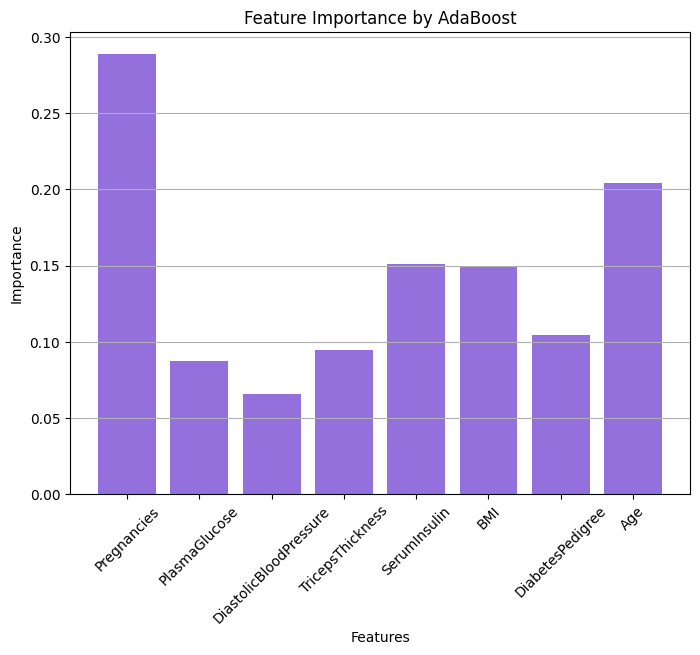

In [22]:
# Feature Importance (Adjusted)
feature_importance = np.zeros(X.shape[1])  # Initialize feature importance array

# Accumulate feature weights from each estimator, weighted by alphas
for alpha, estimator in zip(ada_clf.alphas, ada_clf.estimators):
    if hasattr(estimator, "coef_"):  # Check if estimator has coefficients
        feature_importance += alpha * np.abs(estimator.coef_[0])

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), feature_importance, color="mediumpurple")
plt.xticks(range(X.shape[1]), X.columns, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance by AdaBoost")
plt.grid(axis="y")
plt.show()
